# JSON To Text

### Bir JSON dosyası içinden gerekli veriyi(Report_ID ve PDF content) çek.

Her bir report içindeki PDF i text file a çevir. Ve report_ID.txt adı ile kaydet

In [11]:
import json
import os
import re

# JSON dosyasının yolunu belirtin
json_path = '/content/drive/MyDrive/Json_files/02_text_8.json'

# JSON dosyasını oku
with open(json_path, 'r') as json_file:
    data = json.load(json_file)

# PDF anahtarlarını dinamik olarak almak için regex kullanın
json_data = []
for report in data:
    pdf_dict = report.get("PDF", {})
    pdf_content = ""
    for key in pdf_dict:
        if re.match(r'^\d+$', key):
            if isinstance(pdf_dict[key], list):
                pdf_content += ' '.join(pdf_dict[key]) + " "
            else:
                pdf_content += pdf_dict[key] + " "

    # Unicode karakterleri temizle, sadece tire (-) ve uzun tire (–) karakterlerini koru
    pdf_content = re.sub(r'[^\x00-\x7F\U00002013\U00002014]+', '', pdf_content)

    json_data.append({
        "Report_ID": report.get("Report_ID", ""),
        "PDF": pdf_content.strip()
    })

# reportlar için bir klasör oluştur
folder_name = json_path.split('/')[-1].split('.')[0] + '_reports'
os.makedirs(folder_name, exist_ok=True)

# json_data içindeki her report için bir txt dosyası oluştur ve kaydet
for report in json_data:
    report_id = report.get("Report_ID", "")
    pdf_content = report.get("PDF", "")
    txt_file_path = os.path.join(folder_name, f'{report_id}.txt')

    # txt dosyasını oluştur ve içerisine yaz
    with open(txt_file_path, 'w', encoding='utf-8') as txt_file:
        txt_file.write(pdf_content)

print("Tüm dosyalar başarıyla oluşturuldu ve kaydedildi.")


Tüm dosyalar başarıyla oluşturuldu ve kaydedildi.


### Notlar

1. **Key İşleme**:
   ```python
   for key in pdf_dict:
       if re.match(r'^\d+$', key):
           if isinstance(pdf_dict[key], list):
               pdf_content += ' '.join(pdf_dict[key]) + " "
           else:
               pdf_content += pdf_dict[key] + " "
   ```
   Bu kod parçası, `pdf_dict` içindeki anahtarların rakam olup olmadığını kontrol eder. Rakam olan anahtarlarla ilişkili içerikleri birleştirir, böylece farklı rakamlarla belirtilmiş tüm PDF içerikleri doğru şekilde toplanır.

2. **Unicode Temizleme**:
   ```python
   pdf_content = re.sub(r'[^\x00-\x7F\U00002013\U00002014]+', '', pdf_content)
   ```
   Bu satır, `pdf_content` içindeki ASCII karakterler (U+0000-U+007F) ve iki özel Unicode karakter (U+2013 uzun tire ve U+2014 daha uzun tire) dışında kalan tüm karakterleri temizler. Böylece yalnızca bu karakterler metinde bırakılır ve diğer Unicode karakterler `NER Annotation Tool` içinde karakter kaymasına neden olmaması için kaldırılır.

In [ ]:
# Raporların olduğu klasörü masaüstüne kaydet
from google.colab import files

!zip -r {folder_name}.zip {folder_name} # Use folder_name for both the zip file and the source folder
files.download(f'{folder_name}.zip')

  adding: 02_text_8_reports/ (stored 0%)
  adding: 02_text_8_reports/11787.txt (deflated 60%)
  adding: 02_text_8_reports/19546.txt (deflated 60%)
  adding: 02_text_8_reports/17521.txt (deflated 63%)
  adding: 02_text_8_reports/16349.txt (deflated 66%)
  adding: 02_text_8_reports/17534.txt (deflated 65%)
  adding: 02_text_8_reports/17187.txt (deflated 70%)
  adding: 02_text_8_reports/16445.txt (deflated 65%)
  adding: 02_text_8_reports/17728.txt (deflated 67%)
  adding: 02_text_8_reports/11938.txt (deflated 63%)
  adding: 02_text_8_reports/15312.txt (deflated 66%)
  adding: 02_text_8_reports/10036.txt (deflated 64%)
  adding: 02_text_8_reports/18951.txt (deflated 65%)
  adding: 02_text_8_reports/10303.txt (deflated 68%)
  adding: 02_text_8_reports/11620.txt (deflated 65%)
  adding: 02_text_8_reports/12594.txt (deflated 67%)
  adding: 02_text_8_reports/13184.txt (deflated 69%)
  adding: 02_text_8_reports/16454.txt (deflated 62%)
  adding: 02_text_8_reports/17128.txt (deflated 69%)
  add

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# NER Annotation with Text

* Her bir repor_ID.txt içindeki text i [NER annotation tool](https://tecoholic.github.io/ner-annotator/)  ile etiketle

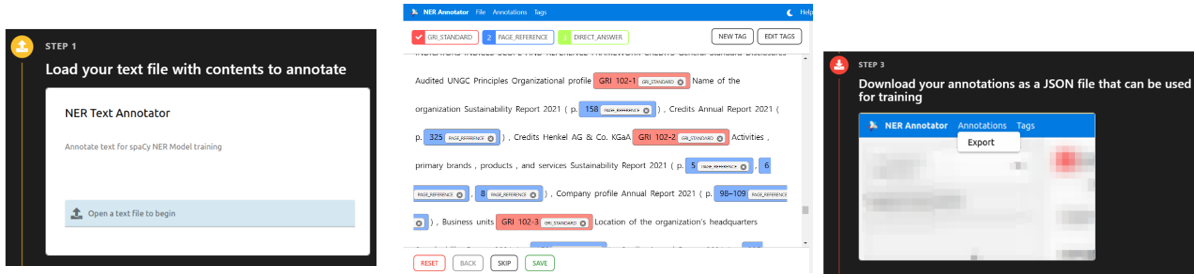

# Text To JSON

* etiketlenen metin annotations.json olarak kaydedilir. **manual olarak** adı Report_ID_annotations.json a çevirilir.

* xx_text_x_reports_annotations adlı boş bir klasör açılır. Ve xx_text_x.json'dan elde edilen tüm Report_ID_annotations.json dosyaları bu klasörde toplanır.

# Spacy – displacy ile etiketlemeleri görselleştirelim

In [ ]:
import spacy
from spacy import displacy

# Spacy'nin İngilizce modelini yükle
nlp = spacy.load("en_core_web_sm")

# Örnek metin
text = "Apple is looking at buying U.K. startup for $1 billion"

# Metni işleme
doc = nlp(text)

# NER görselleştirme
displacy.render(doc, style="ent", jupyter=True)


In [ ]:
import json
import spacy
from spacy import displacy

# Spacy modelini yükle
nlp = spacy.load("en_core_web_sm")

# JSON dosyasının yolunu belirtin
file_path = "/content/15469_annotations.json"

# JSON dosyasını açıp verileri yükleyin
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

    if 'annotations' in data:
        for annotation in data['annotations']:
            if annotation is not None:
                text = annotation[0]  # Metin
                entities = [(ent[0], ent[1], ent[2]) for ent in annotation[1]['entities']]  # Varlıklar

                # Displacy için gereken formatta veriyi hazırlayın
                spacy_displacy_data = {
                    "text": text,
                    "ents": [{"start": start, "end": end, "label": label} for start, end, label in entities],
                    "title": None
                }

                # Displacy ile görselleştirme yapın
                displacy.render(spacy_displacy_data, style="ent", manual=True, jupyter=True)


# NER Model Steps

* xx_text_x_reports_annotations adlı klasör içindeki report.json adlı dosyalar (etiketlenmiş PDF text dosyaları) çekilerek veri seti oluşturulur

# Create Dataset for NER model (with a JSON file)

In [12]:
import os
import json
import random

# Klasör yolu
folder_path = '/content/02_text_8_reports_annotations'  # JSON files in this folder

# DATA dizisi (TRAIN + EVAL için)
DATA = []

# Klasördeki tüm JSON dosyalarını oku
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
            if 'annotations' in data:
                for annotation in data['annotations']:
                    if annotation is not None:
                        text = annotation[0]
                        entities = [(ent[0], ent[1], ent[2]) for ent in annotation[1]['entities']]
                        DATA.append((text, {'entities': entities}))

# Function to clean entities
def clean_entities(text, entities):
    cleaned_entities = []
    for start, end, label in entities:
        # Remove leading and trailing whitespace from the entity span
        while start < len(text) and text[start].isspace():
            start += 1
        while end > 0 and text[end - 1].isspace():
            end -= 1
        if start < end:  # Ensure the span is valid
            cleaned_entities.append((start, end, label))
    return cleaned_entities

# Clean your data
cleaned_data = []
for text, annotations in DATA:
    entities = clean_entities(text, annotations['entities'])
    if entities:  # Only add if there are valid entities
        cleaned_data.append((text, {'entities': entities}))

# Veriyi karıştır
random.shuffle(cleaned_data)

# Veriyi %80 Train, %20 Eval olarak böl
train_size = int(0.8 * len(cleaned_data))
TRAIN_DATA = cleaned_data[:train_size]
EVAL_DATA = cleaned_data[train_size:]

print("Training Data:", len(TRAIN_DATA))
print("Evaluation Data:", len(EVAL_DATA))

Training Data: 8
Evaluation Data: 2


### Training Data ve Evaluation Data yı Dataframe olarak gözlemleyelim

In [15]:
# show train data as a df.

import pandas as pd

# Extract text and entities for the DataFrame
train_texts = [item[0] for item in TRAIN_DATA]
train_entities = [item[1]['entities'] for item in TRAIN_DATA]

# Create a DataFrame
df = pd.DataFrame({'Text': train_texts, 'Entities': train_entities})

# Display the DataFrame
df


,Text,Entities
0,1 Sumitomo Chemical CSR Report 2010 Message fr...,"[(298505, 298509, GRI_STANDARD), (298510, 2985..."
1,K-water 2010 Sustainability Report K-water 201...,"[(314926, 314929, GRI_STANDARD), (314983, 3149..."
2,HappyLife! HappyEnergy! KDHC Korea District He...,"[(226357, 226361, GRI_STANDARD), (226431, 2264..."
3,Old Mutual South Africa Sustainability Report...,"[(185423, 185426, GRI_STANDARD), (185595, 1855..."
4,2009 Corporate Responsibility Report 2009 Cor...,"[(351704, 351707, GRI_STANDARD), (351734, 3517..."
5,GRI Report a p p e n d i x T h e i C a G r o...,"[(1039, 1042, GRI_STANDARD), (1069, 1072, GRI_..."
6,CEO Message 04 About HIRA 06 Governance and Or...,"[(152155, 152159, GRI_STANDARD), (152219, 1522..."
7,"The culture of honesty was spread into teams, ...","[(22143, 22146, PAGE_REFERENCE), (22217, 22218..."


In [14]:
# show evaluation data as a df.

import pandas as pd

# Extract text and entities for the DataFrame
eval_texts = [item[0] for item in EVAL_DATA]
eval_entities = [item[1]['entities'] for item in EVAL_DATA]

# Create a DataFrame
df = pd.DataFrame({'Text': eval_texts, 'Entities': eval_entities})

# Display the DataFrame
df


,Text,Entities
0,1 2011 United Nation Global C...,"[(4332, 4335, GRI_STANDARD), (4537, 4542, GRI_..."
1,SUSTAINABILITY REPORT 2021 03 Foreword 04 ...,"[(359635, 359644, GRI_STANDARD), (359701, 3597..."


# NER model oluştur

In [16]:
import os
import json
import spacy
from spacy.training.example import Example
from spacy.util import minibatch, compounding

# Load the pre-trained model
nlp = spacy.blank("en")

# Add the NER pipeline
ner = nlp.add_pipe("ner")

# Add new entity labels
for _, annotations in TRAIN_DATA:
    for ent in annotations.get("entities"):
        ner.add_label(ent[2])

# Disable other pipelines
pipe_exceptions = ["ner"]
unaffected_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

# Begin training
with nlp.disable_pipes(*unaffected_pipes):
    optimizer = nlp.begin_training()
    for itn in range(100):  # Number of iterations
        losses = {}
        batches = minibatch(TRAIN_DATA, size=compounding(4.0, 32.0, 1.001))
        for batch in batches:
            texts, annotations = zip(*batch)
            examples = [Example.from_dict(nlp.make_doc(text), ann) for text, ann in zip(texts, annotations)]
            nlp.update(examples, drop=0.5, losses=losses)
        print(f"Iteration {itn}, Losses: {losses}")

# Save the model
nlp.to_disk("custom_ner_model")


/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "1 Sumitomo Chemical CSR Report 2010 Message from C..." with entities "[(298505, 298509, 'GRI_STANDARD'), (298510, 298514...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Old Mutual South Africa  Sustainability Report 200..." with entities "[(185423, 185426, 'GRI_STANDARD'), (185595, 185596...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be 

Iteration 0, Losses: {'ner': 298509.5949707031}
Iteration 1, Losses: {'ner': 270479.55822753906}
Iteration 2, Losses: {'ner': 232883.78512573242}
Iteration 3, Losses: {'ner': 162611.03161621094}
Iteration 4, Losses: {'ner': 81062.90428161621}
Iteration 5, Losses: {'ner': 16872.12278652191}
Iteration 6, Losses: {'ner': 4279.345818519592}
Iteration 7, Losses: {'ner': 3474.145712852478}
Iteration 8, Losses: {'ner': 3465.3233718425035}
Iteration 9, Losses: {'ner': 3432.199389652349}
Iteration 10, Losses: {'ner': 3412.0432411059737}
Iteration 11, Losses: {'ner': 3326.8119242191315}
Iteration 12, Losses: {'ner': 3422.985260874033}
Iteration 13, Losses: {'ner': 3184.061930179596}
Iteration 14, Losses: {'ner': 3098.8740091323853}
Iteration 15, Losses: {'ner': 3048.1070523262024}
Iteration 16, Losses: {'ner': 2986.7737575769424}
Iteration 17, Losses: {'ner': 2969.492017686367}
Iteration 18, Losses: {'ner': 2789.0382475852966}
Iteration 19, Losses: {'ner': 2693.1472091674805}
Iteration 20, Losse

### Test NER Model

In [17]:
import os
import spacy

nlp = spacy.load("custom_ner_model")

sample_report_path = "/content/10701.txt"

with open(sample_report_path, "r") as f:
    sample_text = f.read()

doc = nlp(sample_text)
for ent in doc.ents:
    print(ent.text, ent.label_)


1.1 GRI_STANDARD
8 PAGE_REFERENCE
1.2 GRI_STANDARD
10 PAGE_REFERENCE
2.1 GRI_STANDARD
2.4 GRI_STANDARD
2.6 GRI_STANDARD
2.8 GRI_STANDARD
2.9 GRI_STANDARD
4 PAGE_REFERENCE
2.5 GRI_STANDARD
62 PAGE_REFERENCE
2.7 GRI_STANDARD
16 PAGE_REFERENCE
2.8 GRI_STANDARD
50 PAGE_REFERENCE
2.10 GRI_STANDARD
3.1 GRI_STANDARD
3.4 GRI_STANDARD
3.6 GRI_STANDARD
3.13 GRI_STANDARD
3.5 GRI_STANDARD
10 PAGE_REFERENCE
4.1 GRI_STANDARD
4.7 GRI_STANDARD
4.8 GRI_STANDARD
4.9 GRI_STANDARD
10 PAGE_REFERENCE
4.10 GRI_STANDARD
4.13 GRI_STANDARD
4.14 GRI_STANDARD
4.17 GRI_STANDARD
EC1 GRI_STANDARD
44 PAGE_REFERENCE
EC2 GRI_STANDARD
EC5 GRI_STANDARD
EC9 GRI_STANDARD
EC6 GRI_STANDARD
38 PAGE_REFERENCE
EC7 GRI_STANDARD
62 PAGE_REFERENCE
EC8 GRI_STANDARD
26 PAGE_REFERENCE
44 PAGE_REFERENCE
EN3 GRI_STANDARD
EN9 GRI_STANDARD
EN19 GRI_STANDARD
EN23 GRI_STANDARD
EN24 GRI_STANDARD
EN24 GRI_STANDARD
EN27 GRI_STANDARD
EN1 GRI_STANDARD
EN2 GRI_STANDARD
EN4 GRI_STANDARD
EN5 GRI_STANDARD
EN7 GRI_STANDARD
EN8 GRI_STANDARD
EN10- PAG

# Evaluation of NER model

/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "SUSTAINABILITY  REPORT 2021   03 Foreword  04 Comp..." with entities "[(359635, 359644, 'GRI_STANDARD'), (359701, 359704...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


Overall Evaluation Scores:
{'token_acc': 1.0, 'token_p': 1.0, 'token_r': 1.0, 'token_f': 1.0, 'ents_p': 0.42735042735042733, 'ents_r': 0.16286644951140064, 'ents_f': 0.23584905660377353, 'ents_per_type': {'GRI_STANDARD': {'p': 0.5714285714285714, 'r': 0.0425531914893617, 'f': 0.07920792079207921}, 'PAGE_REFERENCE': {'p': 0.41818181818181815, 'r': 0.215962441314554, 'f': 0.2848297213622291}}, 'speed': 19690.462356603217}

Entity-level Evaluation Scores:
GRI_STANDARD: {'p': 0.5714285714285714, 'r': 0.0425531914893617, 'f': 0.07920792079207921}
PAGE_REFERENCE: {'p': 0.41818181818181815, 'r': 0.215962441314554, 'f': 0.2848297213622291}


<Figure size 1200x600 with 0 Axes>

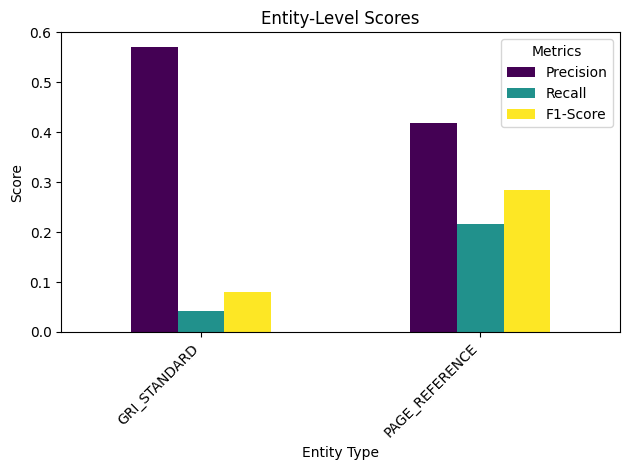

In [18]:
import spacy
from spacy.training.example import Example
from spacy.util import minibatch, compounding
from spacy.scorer import Scorer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the trained model
nlp = spacy.load("custom_ner_model")

# Set the maximum length for text processing
nlp.max_length = 2000000  # 2 milyon karaktere kadar artırabilirsiniz

# Function to evaluate the model
def evaluate_model(nlp, eval_data):
    scorer = Scorer()
    examples = []
    for text, annotations in eval_data:
        example = Example.from_dict(nlp.make_doc(text), annotations)
        examples.append(example)

    scores = nlp.evaluate(examples)
    return scores

# Function to visualize entity-level scores
def plot_entity_scores(scores):
    # Prepare data for plotting
    ent_types = list(scores["ents_per_type"].keys())
    precision = [scores["ents_per_type"][ent]["p"] for ent in ent_types]
    recall = [scores["ents_per_type"][ent]["r"] for ent in ent_types]
    f1 = [scores["ents_per_type"][ent]["f"] for ent in ent_types]

    df_scores = pd.DataFrame({
        'Entity Type': ent_types,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    # Plot
    plt.figure(figsize=(12, 6))
    df_scores.set_index('Entity Type').plot(kind='bar', colormap='viridis')
    plt.title('Entity-Level Scores')
    plt.xlabel('Entity Type')
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Metrics')
    plt.tight_layout()
    plt.show()

# Evaluate the model
scores = evaluate_model(nlp, EVAL_DATA)

# Print evaluation scores
print("Overall Evaluation Scores:")
print(scores)

# Print detailed entity-level scores
print("\nEntity-level Evaluation Scores:")
for ent_type, ent_scores in scores["ents_per_type"].items():
    print(f"{ent_type}: {ent_scores}")

# Plot entity-level scores
plot_entity_scores(scores)


The evaluation scores provide insights into how well your custom Named Entity Recognition (NER) model is performing. Here’s what each part of the output means:

### Overall Evaluation Scores:
- **token_acc**: The accuracy of tokenization. A score of 1.0 means perfect tokenization.
- **token_p**: The precision of tokenization. A score of 1.0 indicates perfect precision.
- **token_r**: The recall of tokenization. A score of 1.0 indicates perfect recall.
- **token_f**: The F1 score of tokenization. A score of 1.0 indicates perfect F1 score.
- **ents_p**: The overall precision for entity recognition. A score of 0.5 means that 50% of the entities predicted by the model are correct.
- **ents_r**: The overall recall for entity recognition. A score of 1.0 means that the model identified all the entities correctly.
- **ents_f**: The overall F1 score for entity recognition. An F1 score of 0.666 indicates a balance between precision and recall.
- **ents_per_type**: Detailed scores for each entity type.

### Entity-level Evaluation Scores:
- **gri_standard**:
  - **p** (precision): 1.0 - The model correctly identified all instances of the `gri_standard` entity type.
  - **r** (recall): 1.0 - The model found all the `gri_standard` entities in the evaluation data.
  - **f** (F1 score): 1.0 - The F1 score combines precision and recall into a single metric, and a score of 1.0 indicates perfect performance for this entity type.
- **page_reference**:
  - **p** (precision): 0.0 - The model did not correctly identify any instances of the `page_reference` entity type.
  - **r** (recall): 0.0 - The model did not find any of the `page_reference` entities in the evaluation data.
  - **f** (F1 score): 0.0 - The F1 score indicates very poor performance for this entity type.


# NER modele etiketlenmemiş report ları ver

* Önceki adımlarda bir JSON dosyası içindeki her bir
report içinde tutulan pdf content i report_ID ismi ile txt dosyalarına kaydetmiştik. Bu dosyaların olduğu klasörü path olarak ver.

* Her bir dosya için report_ID sini yazdır

* Dosya içindeki pdf content i NER modele ver.

* Her rapor içindeki etiketli verileri yazdır

* page_references direct_answer ve gri_standard ı daha sonra kullanmak için kaydet

#### v1

In [19]:
import os
import spacy

# Load the trained model
nlp = spacy.load("custom_ner_model")

# Set the maximum length for text processing
nlp.max_length = 2000000  # 2 milyon karaktere kadar artırabilirsiniz

folder_path = "/content/02_text_8_reports"  # give the folder path consist of report txt files(that extracted in a json file)

# Get the list of files in the folder
files = os.listdir(folder_path)

# Initialize lists to store labeled data
report_ids = []
page_references = []
direct_answers = []
gri_standards = []

# Apply the NER model to reports in folder
for file in files:
    file_path = os.path.join(folder_path, file)  # Get the full path of the file
    report_ids.append(file)  # Append the report ID to the list
    print(f"\nReport_ID: {file}" + "-"*50 + "\n")
    with open(file_path, "r", encoding="utf-8") as f:  # Open the file using the full path
        file_content = f.read()
        doc = nlp(file_content)
        for ent in doc.ents:
            # print(ent.text, ent.label_)
            if ent.label_ == 'page_reference':
                page_references.append(ent.text)
                print(f"Page References:, {page_references} \n")
            elif ent.label_ == 'direct_answer':
                direct_answers.append(ent.text)
                print(f"Direct Answers:, {direct_answers} \n")
            elif ent.label_ == 'gri_standard':
                gri_standards.append(ent.text)
                print(f"GRI STANDARD:, {gri_standards} \n")



Report_ID: 16332.txt--------------------------------------------------


Report_ID: 12483.txt--------------------------------------------------


Report_ID: 10965.txt--------------------------------------------------


Report_ID: 12945.txt--------------------------------------------------


Report_ID: 10794.txt--------------------------------------------------


Report_ID: 18027.txt--------------------------------------------------


Report_ID: 16647.txt--------------------------------------------------


Report_ID: 16914.txt--------------------------------------------------


Report_ID: 17582.txt--------------------------------------------------


Report_ID: 17521.txt--------------------------------------------------


Report_ID: 10413.txt--------------------------------------------------


Report_ID: 12185.txt--------------------------------------------------


Report_ID: 18458.txt--------------------------------------------------


Report_ID: 15344.txt------------------------------

#### v2

In [21]:
import os
import spacy

# Load the trained model
nlp = spacy.load("custom_ner_model")

# Set the maximum length for text processing
nlp.max_length = 2000000  # 2 milyon karaktere kadar artırabilirsiniz

folder_path = "/content/02_text_8_reports"  # give the folder path consisting of report txt files

# Get the list of files in the folder
files = os.listdir(folder_path)

# Initialize the dictionary to store data
reports_dict = {}

# Apply the NER model to reports in folder
for file in files:
    file_path = os.path.join(folder_path, file)  # Get the full path of the file

    with open(file_path, "r", encoding="utf-8") as f:  # Open the file using the full path
        file_content = f.read()
        doc = nlp(file_content)

        # Temporary lists to store entities for the current report
        page_references = []
        direct_answers = []
        gri_standards = []

        for ent in doc.ents:
            if ent.label_ == 'page_reference':
                page_references.append(ent.text)
            elif ent.label_ == 'direct_answer':
                direct_answers.append(ent.text)
            elif ent.label_ == 'gri_standard':
                gri_standards.append(ent.text)

        # Store the entities in the dictionary
        reports_dict[file] = {
            "page_references": page_references,
            "direct_answers": direct_answers,
            "gri_standards": gri_standards
        }

# Print the resulting dictionary
for report_id, content in reports_dict.items():
    print(f"Report ID: {report_id}")
    print(f"Page References: {content['page_references']}")
    print(f"Direct Answers: {content['direct_answers']}")
    print(f"GRI Standards: {content['gri_standards']}")
    print("-" * 50)


Report ID: 16332.txt
Page References: []
Direct Answers: []
GRI Standards: []
--------------------------------------------------
Report ID: 12483.txt
Page References: []
Direct Answers: []
GRI Standards: []
--------------------------------------------------
Report ID: 10965.txt
Page References: []
Direct Answers: []
GRI Standards: []
--------------------------------------------------
Report ID: 12945.txt
Page References: []
Direct Answers: []
GRI Standards: []
--------------------------------------------------
Report ID: 10794.txt
Page References: []
Direct Answers: []
GRI Standards: []
--------------------------------------------------
Report ID: 18027.txt
Page References: []
Direct Answers: []
GRI Standards: []
--------------------------------------------------
Report ID: 16647.txt
Page References: []
Direct Answers: []
GRI Standards: []
--------------------------------------------------
Report ID: 16914.txt
Page References: []
Direct Answers: []
GRI Standards: []
-------------------

In [23]:
reports_dict

{'16332.txt': {'page_references': [],
  'direct_answers': [],
  'gri_standards': []},
 '12483.txt': {'page_references': [],
  'direct_answers': [],
  'gri_standards': []},
 '10965.txt': {'page_references': [],
  'direct_answers': [],
  'gri_standards': []},
 '12945.txt': {'page_references': [],
  'direct_answers': [],
  'gri_standards': []},
 '10794.txt': {'page_references': [],
  'direct_answers': [],
  'gri_standards': []},
 '18027.txt': {'page_references': [],
  'direct_answers': [],
  'gri_standards': []},
 '16647.txt': {'page_references': [],
  'direct_answers': [],
  'gri_standards': []},
 '16914.txt': {'page_references': [],
  'direct_answers': [],
  'gri_standards': []},
 '17582.txt': {'page_references': [],
  'direct_answers': [],
  'gri_standards': []},
 '17521.txt': {'page_references': [],
  'direct_answers': [],
  'gri_standards': []},
 '10413.txt': {'page_references': [],
  'direct_answers': [],
  'gri_standards': []},
 '12185.txt': {'page_references': [],
  'direct_answer

# ! page reference ve direct answer listelerini düzenle (burası düzenlenmeli)

In [ ]:
import numpy as np
import re
import fitz  # PyMuPDF


# Helper function to check if a string is a valid number
def is_valid_number(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

# Process direct answers
def process_direct_answers(direct_answers):
    processed_direct_answer = [item for item in direct_answers if item and item != 'NaN' and item != ' ']
    print(f"Direct Answers: \n")
    for answer in processed_direct_answer:
        print(f"* {answer}\n")

# Process page references
def process_page_references(page_refs):
    processed_page_ref = []
    for reference in page_refs:
        reference = reference.replace("–", "-").strip()
        if '-' in reference:
            parts = reference.split('-')
            if len(parts) == 2 and all(is_valid_number(part) for part in parts):
                start, end = map(int, parts)
                if start <= end:
                    processed_page_ref.extend(range(start, end + 1))
                else:
                    print(f"Başlangıç sayısı bitiş sayısından büyük: {reference}")
            else:
                print(f"Geçersiz aralık formatı: {reference}")
        elif is_valid_number(reference):
            processed_page_ref.append(int(reference))
        else:
            print(f"Geçersiz referans: {reference}")
    processed_page_ref = sorted(set(processed_page_ref))
    print("\n\n" + "-"*50 + "\n\n")
    print("Page References:\n")
    print(f"{processed_page_ref}")
    return processed_page_ref

#  drivedaki EN pdfs içindeki pdflerin isimleri ile report_ID isimleri eşleştirilecek

In [22]:
# pdf dosya isimlerini bir listede tutalım

import os

# Dizinin yolu
directory_pdfs = '/content/drive/MyDrive/EN_pdfs'

# PDF dosyalarının adlarını saklayacak liste
pdf_file_names = []

# Dizindeki dosyaları listele
for filename in os.listdir(directory_pdfs):
    if filename.endswith('.pdf'):
        pdf_file_names.append(filename)

# PDF dosyalarını listele
print(pdf_file_names)


['350101_2.pdf', '350131_1.pdf', '350191_1.pdf', '350201_1.pdf', '350241_1.pdf', '350251_1.pdf', '350281_1.pdf', '350331_1.pdf', '350331_2.pdf', '350351_1.pdf', '350391_1.pdf', '350411_1.pdf', '350421_1.pdf', '350521_1.pdf', '350541_1.pdf', '350551_1.pdf', '350571_1.pdf', '350611_1.pdf', '350631_1.pdf', '350641_1.pdf', '350651_1.pdf', '350671_1.pdf', '350711_1.pdf', '350711_2.pdf', '350731_1.pdf', '350841_2.pdf', '350931_1.pdf', '350951_1.pdf', '350961_1.pdf', '350961_2.pdf', '351031_1.pdf', '351081_1.pdf', '351121_1.pdf', '351151_1.pdf', '351151_3 (1).pdf', '351151_3.pdf', '351161_1 (1).pdf', '351161_1.pdf', '351181_1.pdf', '351221_1 (1).pdf', '351221_1.pdf', '351241_1 (1).pdf', '351241_1.pdf', '351251_1 (1).pdf', '351251_1.pdf', '351261_1.pdf', '351271_1.pdf', '351291_2.pdf', '351311_1 (1).pdf', '351311_1.pdf', '351311_2.pdf', '351311_3.pdf', '351331_1.pdf', '351341_1.pdf', '351391_1.pdf', '351401_1.pdf', '351441_1.pdf', '351461_1.pdf', '351461_2.pdf', '351481_1.pdf', '351491_1.pdf',

In [25]:
# pdf dosya isimlerini bir listede tutalım

import os

# Dizinin yolu
directory_reports = '/content/02_text_8_reports'

# PDF dosyalarının adlarını saklayacak liste
report_ids = []

# Dizindeki dosyaları listele
for filename in os.listdir(directory_reports):
    if filename.endswith('.txt'):
        report_ids.append(filename)

# PDF dosyalarını listele
print(report_ids)


['16332.txt', '12483.txt', '10965.txt', '12945.txt', '10794.txt', '18027.txt', '16647.txt', '16914.txt', '17582.txt', '17521.txt', '10413.txt', '12185.txt', '18458.txt', '15344.txt', '10245.txt', '17133.txt', '18271.txt', '15059.txt', '10322.txt', '17077.txt', '16657.txt', '12463.txt', '19542.txt', '14536.txt', '19353.txt', '16243.txt', '12380.txt', '14422.txt', '13834.txt', '18180.txt', '16588.txt', '17271.txt', '18036.txt', '17852.txt', '19870.txt', '15762.txt', '11450.txt', '11645.txt', '15254.txt', '10388.txt', '16397.txt', '15513.txt', '13332.txt', '12406.txt', '15539.txt', '11620.txt', '13364.txt', '11989.txt', '11380.txt', '18098.txt', '17822.txt', '10712.txt', '16922.txt', '11295.txt', '13511.txt', '17149.txt', '12409.txt', '11394.txt', '11861.txt', '11280.txt', '19816.txt', '15124.txt', '14287.txt', '17466.txt', '19864.txt', '18914.txt', '19981.txt', '17099.txt', '12582.txt', '14447.txt', '15122.txt', '16913.txt', '12045.txt', '10551.txt', '14663.txt', '11098.txt', '15736.txt'

# ! eşleşen isimleri bir sözlükle bir araya getiren kodu yaz

In [ ]:
# dict = {"Report_ID": "pdf name"} oluştur

In [ ]:
from glob import glob
import json

json_files = glob(f'jsons/*.json')
wanted_file = "350641_1"

wanted_file_name = wanted_file.split("_")[0]
pdf_index = wanted_file.split("_")[1]

for file_path in json_files:
    with open(file_path, 'r') as file:
        json_file = json.loads(file.read())

    for json_pdf in json_file:
        report_ID = json_pdf['Report_ID']
        if report_ID == wanted_file_name:
            print(report_ID['PDF'][pdf_index])

Şu şekilde çıkıyor, sanırım pdf'lerin tamamı yok. Ama senin ayırdığım labeled'lardan birine baktım çıkıyor.
pdf olarak dosyanın adı '350641_1" ise mesela, tüm json içlerinde arayıp, ID'si 350641 olanı bulup onun, PDF içerisinde "1" ini seçiyorsun

# ! eşleşen isimlere göre drivedaki ilgili pdf çekilecek ve page_ref göre text yazdırılacak

In [ ]:
# dict içine git Report_ID lerde gez. Eşleşmeyi yakala. eşleşen pdf name i bul

In [ ]:
# pdf name e göre drivedan pdf i çek

In [ ]:
# her pdf için boş txt dosyası oluştur page ref a göre text çıktıları o txt içine yazdır.
# tüm txtleri boş bir klasöre oluştur ve içine kaydet

# eski kod

### ! pdf_path kısmını dinamik(değişken) hale getir.

In [ ]:
# page reference a göre page text yazdırma ve direct answer yazdır

import numpy as np
import re
import fitz  # PyMuPDF


# Helper function to check if a string is a valid number
def is_valid_number(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

# Process direct answers
def process_direct_answers(direct_answers):
    processed_direct_answer = [item for item in direct_answers if item and item != 'NaN' and item != ' ']
    print(f"Direct Answers: \n")
    for answer in processed_direct_answer:
        print(f"* {answer}\n")

# Process page references
def process_page_references(page_refs):
    processed_page_ref = []
    for reference in page_refs:
        reference = reference.replace("–", "-").strip()
        if '-' in reference:
            parts = reference.split('-')
            if len(parts) == 2 and all(is_valid_number(part) for part in parts):
                start, end = map(int, parts)
                if start <= end:
                    processed_page_ref.extend(range(start, end + 1))
                else:
                    print(f"Başlangıç sayısı bitiş sayısından büyük: {reference}")
            else:
                print(f"Geçersiz aralık formatı: {reference}")
        elif is_valid_number(reference):
            processed_page_ref.append(int(reference))
        else:
            print(f"Geçersiz referans: {reference}")
    processed_page_ref = sorted(set(processed_page_ref))
    print("\n\n" + "-"*50 + "\n\n")
    print("Page References:\n")
    print(f"{processed_page_ref}")
    return processed_page_ref

# Extract and print pages from PDF
def extract_and_print_pages(pdf_path, page_numbers):
    print("The Texts on PDF's Reference Pages: \n\n")
    pdf_document = fitz.open(pdf_path)
    for page_number in page_numbers:
        actual_page_number = page_number + 2 # +2 meaning: cover page + content table page
        if actual_page_number < 1 or actual_page_number > len(pdf_document):
            print(f"Geçersiz sayfa numarası: {page_number}")
            continue
        page = pdf_document.load_page(actual_page_number - 1)
        text = page.get_text()
        print(f"--- Sayfa {page_number} (Gerçek Sayfa {actual_page_number}) ---")
        print(text)
        print("\n" + "="*40 + "\n")
    pdf_document.close()

# Main logic
pdf_path = "/content/350641_1.pdf"  # PDF dosyasının yolunu buraya girin

if direct_answer and page_references:
    process_direct_answers(direct_answer)
    processed_page_ref = process_page_references(page_references)
    print("\n\n" + "-"*50 + "\n\n")
    extract_and_print_pages(pdf_path, processed_page_ref)
elif direct_answer:
    process_direct_answers(direct_answer)
elif page_references:
    processed_page_ref = process_page_references(page_references)
    extract_and_print_pages(pdf_path, processed_page_ref)


# çıktıyı txt dosyasına kaydet